# CASE STUDY ON PRE-PROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1.Load the dataset into python environment**

In [ ]:
data=pd.read_csv("/content/titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **2. Make ‘PassengerId’ as the index column**


In [ ]:
data=pd.read_csv("/content/titanic_dataset.csv",index_col='PassengerId')

In [ ]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# **3. Check the basic details of the dataset**

In [ ]:
data.shape

(891, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# **4. Fill in all the missing values present in all the columns in the dataset**

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

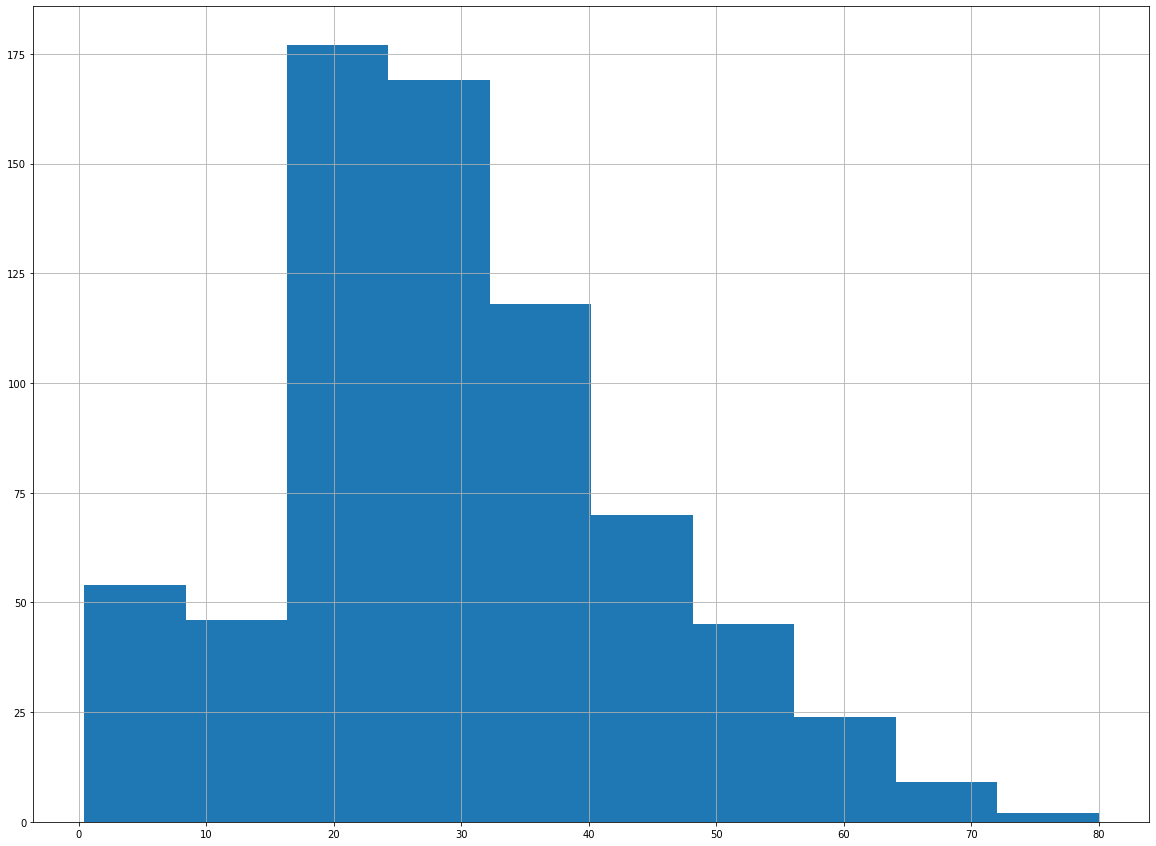

In [ ]:
freqgraph=data.Age
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [ ]:
data.drop('Cabin',axis=1,inplace=True)
data.dropna(inplace=True)

In [ ]:
data.Embarked = data.Embarked.fillna('NA')

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# **5. Check and handle outliers in at least 3 columns in the dataset**

**a.Age Column**

Text(0.5, 1.0, 'Box plot of Age')

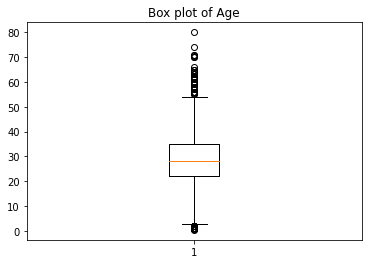

In [ ]:
plt.boxplot(data['Age'])
plt.title("Box plot of Age")

In [ ]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [ ]:
outlier = []
for x in data['Age']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0,
 56.0]

In [ ]:
ind1=data['Age']>Up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            852, 880],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            852, 880],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

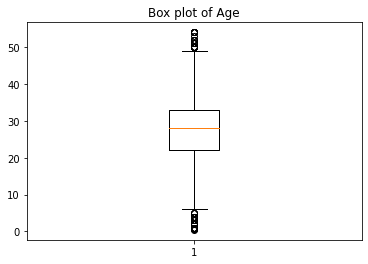

In [ ]:
plt.boxplot(data['Age'])
plt.title("Box plot of Age")

**b.SibSp column**

Text(0.5, 1.0, 'Box plot of SibSp')

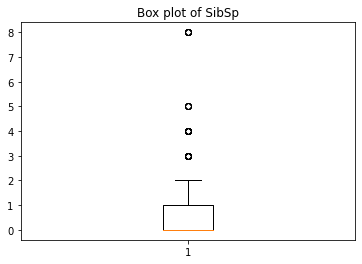

In [ ]:
plt.boxplot(data['SibSp'])
plt.title("Box plot of SibSp")

In [ ]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [ ]:
outlier = []
for x in data['Age']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 28.0,
 54.0,
 27.0,
 14.0,
 4.0,
 20.0,
 39.0,
 14.0,
 28.0,
 31.0,
 28.0,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 28.0,
 19.0,
 28.0,
 28.0,
 40.0,
 28.0,
 28.0,
 28.0,
 42.0,
 28.0,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 28.0,
 3.0,
 19.0,
 28.0,
 28.0,
 28.0,
 28.0,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 28.0,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 45.0,
 4.0,
 28.0,
 28.0,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 28.0,
 28.0,
 30.0,
 22.0,
 29.0,
 28.0,
 28.0,
 17.0,
 33.0,
 16.0,
 28.0,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 28.0,
 23.0,
 34.0,
 34.0,
 28.0,
 28.0,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 28.0,
 38.0,
 28.0,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 29.0,
 24.0,
 21.0,
 28.0,
 32.5,
 32.5,
 54.0,
 12.0,
 28.0,
 24.0,
 28.0,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 28.0,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 40.5,
 28.0,
 51.0,
 16.0,

In [ ]:
ind1=data['SibSp']>Up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [ ]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

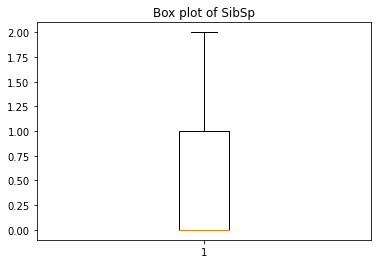

In [ ]:
plt.boxplot(data['SibSp'])
plt.title("Box plot of SibSp")

**c.Fare Column**

Text(0.5, 1.0, 'Box plot of Fare')

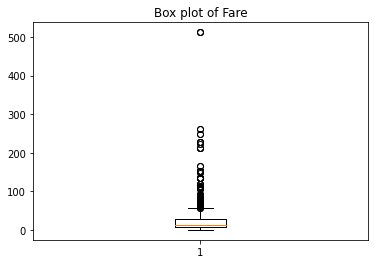

In [ ]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare")

In [ ]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR

In [ ]:
outlier = []
for x in data['Fare']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [ ]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [ ]:
ind1=data['Fare']>Up_lim
in2=data.loc[ind1].index
data.drop(in2,inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

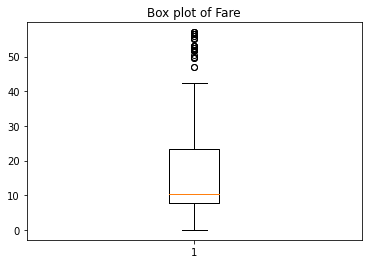

In [ ]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare")

Converting Categorical data :- Replacing categorical features with dummy variables in pandas. Otherwise Machine learning algorithm will not be able to directly take in those features as inputs.

In [ ]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
PassengerId,,
1,0,1
3,0,1
4,0,1
5,0,1
6,1,0


In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)
data.drop(['Sex','Embarked','Name','Ticket'],axis =1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
6,0,3,28.0,0,0,8.4583


In [ ]:
data=pd.concat([data,sex,embark],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
6,0,3,28.0,0,0,8.4583,1,1,0


# **6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [ ]:
from sklearn import preprocessing
X=data.drop('Survived',axis=1)

In [ ]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
X=min_max.fit_transform(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.752504,0.515178,0.141631,0.048164,0.287842,0.686695,0.097282,0.752504
std,0.355439,0.189452,0.256655,0.127365,0.220339,0.464169,0.296553,0.431867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.000000,0.000000,0.138195,0.000000,0.000000,1.000000
50%,1.000000,0.514744,0.000000,0.000000,0.184211,1.000000,0.000000,1.000000
75%,1.000000,0.603397,0.500000,0.000000,0.407895,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.head()

,0,1,2,3,4,5,6,7
0,1.0,0.402762,0.5,0.0,0.127193,1.0,0.0,1.0
1,1.0,0.477417,0.0,0.0,0.139035,0.0,0.0,1.0
2,0.0,0.645390,0.5,0.0,0.931579,0.0,0.0,1.0
3,1.0,0.645390,0.0,0.0,0.141228,1.0,0.0,1.0
4,1.0,0.514744,0.0,0.0,0.148391,1.0,1.0,0.0


Here all the entries in the dataframe are in the range (0,1).